In [34]:
import pandas as pd

# Load the CSV file
file_path = 'data/new Cyclist data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure and contents
data.head()

,date_AEST,Time_first,Time_last,Distance,calories,Speed_max,Speed_min,Speed_avg,Heartrate_max,Heartrate_min,...,Time_Taken,dist_point in 20,calories_point in 20,hertrate_point in20,Speed_point iin 20,power_points in 20,candence_point in 20,total_points,Duration,Workout_duration
0,12-Mar-21,##############################################...,##############################################...,10.31,222.0,33.24,0.0,18.74,183.99,104.18,...,0.355995,5.641587,4.712790,20.0,13.206483,11.103448,11.103448,65.767757,09:13:41,9
1,15-Mar-21,##############################################...,##############################################...,5.18,99.0,35.58,0.0,20.79,183.99,104.18,...,0.456019,2.834473,2.101650,20.0,14.651163,10.982509,10.982509,61.552303,10:13:41,10
2,18-Mar-21,##############################################...,##############################################...,20.12,479.0,53.56,0.0,23.97,183.99,104.18,...,0.234861,11.009576,10.168588,20.0,16.892178,15.812094,15.812094,89.694530,11:13:41,11
3,20-Mar-21,##############################################...,##############################################...,5.77,109.0,36.22,0.0,18.46,183.99,104.18,...,0.021157,3.157319,2.313938,20.0,13.009161,9.896052,9.896052,58.272522,12:13:41,12
4,30-Mar-21,##############################################...,##############################################...,5.95,134.0,44.60,0.0,23.84,183.99,104.18,...,0.260984,3.255814,2.844657,20.0,16.800564,14.320840,14.320840,71.542714,13:13:41,13


In [35]:
# Creating a new column 'Real_duration' by dividing Distance by Speed_avg
# The real duration will be in hours since Distance is likely in km and Speed_avg in km/h
data['Real_duration'] = data['Distance'] / data['Speed_avg']

# Display the first few rows of the dataframe with the new column
data[['Distance', 'Speed_avg', 'Real_duration']].head()

,Distance,Speed_avg,Real_duration
0,10.31,18.74,0.550160
1,5.18,20.79,0.249158
2,20.12,23.97,0.839383
3,5.77,18.46,0.312568
4,5.95,23.84,0.249581


In [36]:
# Calculate the correlation of 'Real_duration' with other fields in the dataset
correlations = data.corr()['Real_duration']

# Display the correlations
correlations.sort_values(ascending=False)

/var/folders/pk/jkqf1fd561d112pccy3prkp80000gn/T/ipykernel_18962/1033359430.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corr()['Real_duration']


Real_duration           1.000000
Distance                0.980377
calories                0.939534
dist_point in 20        0.653018
calories_point in 20    0.544302
total_points            0.543363
Cadence_max             0.511327
Speed_max               0.442865
Speed_point iin 20      0.327213
Power_max               0.291658
Cadence_avg             0.241763
Speed_avg               0.221807
Time_Taken              0.191718
power_points in 20      0.151678
candence_point in 20    0.151678
Cadence_min             0.109012
Power_avg               0.042790
Heartrate_max          -0.098451
Workout_duration       -0.117310
Speed_min              -0.118640
Heartrate_min          -0.181052
Heartrate_avg          -0.205835
hertrate_point in20    -0.223964
Power_min                    NaN
FTP                          NaN
Name: Real_duration, dtype: float64

In [37]:
# Converting the correlations into a DataFrame for better visualization
correlations_df = correlations.to_frame().reset_index()
correlations_df.columns = ['Field', 'Correlation with Real_duration']

# Display the table
correlations_df.sort_values(by='Correlation with Real_duration', ascending=False)


,Field,Correlation with Real_duration
24,Real_duration,1.000000
0,Distance,0.980377
1,calories,0.939534
16,dist_point in 20,0.653018
17,calories_point in 20,0.544302
22,total_points,0.543363
8,Cadence_max,0.511327
2,Speed_max,0.442865
19,Speed_point iin 20,0.327213
11,Power_max,0.291658


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Preparing the data for the model
# Dropping rows with NaN values and removing the target variable 'Real_duration' from the predictors
data_cleaned = data.dropna()
X = data_cleaned.drop(['Real_duration', 
                       'date_AEST', 
                       'Time_first', 
                       'Time_last', 
                       'Duration', 
                       'Time_Taken',
                       'Workout_duration',
                       'dist_point in 20',
                       'calories_point in 20',
                       'Speed_point iin 20',
                       'power_points in 20',
                       'candence_point in 20',
                       'total_points'], 
                       axis=1)
y = data_cleaned['Real_duration']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_model.predict(X_test)

# Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
mse

0.008086536435786652

In [39]:
from sklearn.linear_model import LinearRegression

# Creating and training the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_lr = lr_model.predict(X_test)

# Calculating the Mean Squared Error for the linear regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_lr

0.009752134201435059

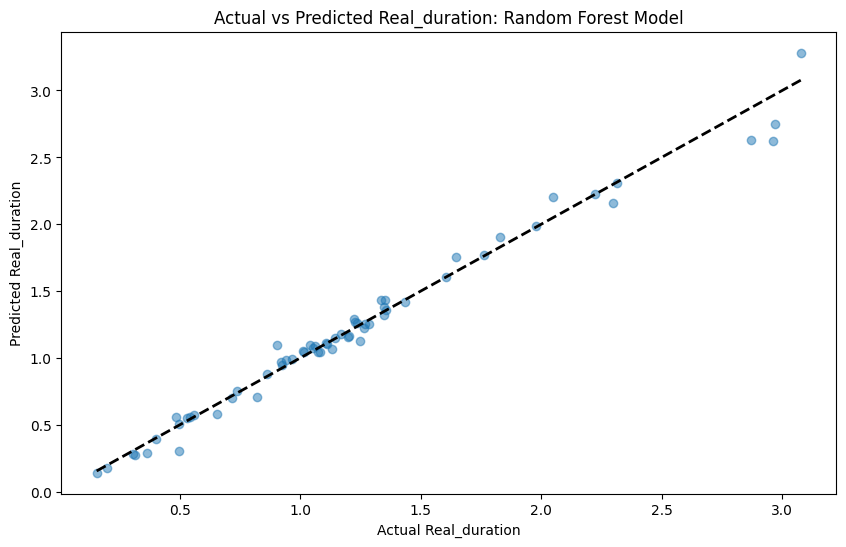

In [40]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Real_duration')
plt.ylabel('Predicted Real_duration')
plt.title('Actual vs Predicted Real_duration: Random Forest Model')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.show()


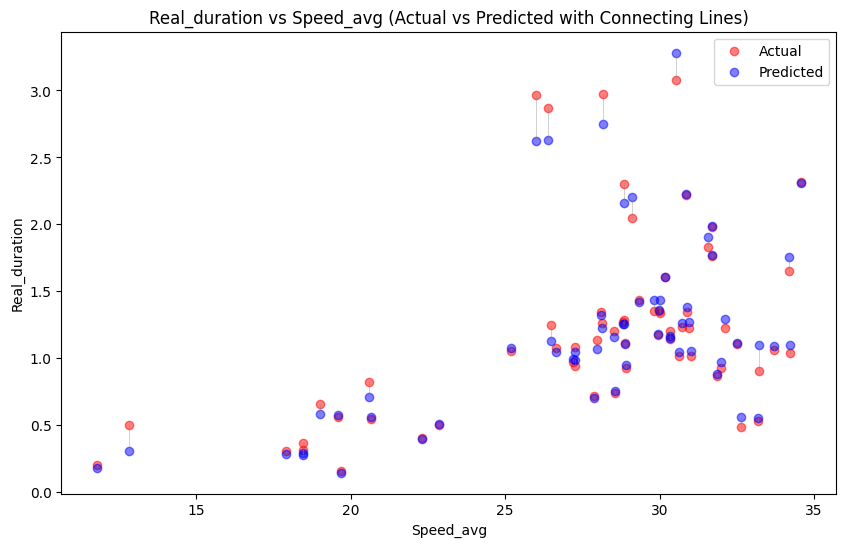

In [42]:
# Scatter plot of Real_duration vs Speed_avg with actual values in red, predicted values in blue,
# and thin connecting lines between actual and predicted for each case
plt.figure(figsize=(10, 6))

# Plotting actual values
plt.scatter(X_test['Speed_avg'], y_test, color='red', alpha=0.5, label='Actual')

# Plotting predicted values
plt.scatter(X_test['Speed_avg'], y_pred, color='blue', alpha=0.5, label='Predicted')

# Drawing lines between actual and predicted values
for i in range(len(X_test)):
    plt.plot([X_test['Speed_avg'].iloc[i], X_test['Speed_avg'].iloc[i]], 
             [y_test.iloc[i], y_pred[i]], color='grey', alpha=0.5, linewidth=0.5)

plt.xlabel('Speed_avg')
plt.ylabel('Real_duration')
plt.title('Real_duration vs Speed_avg (Actual vs Predicted)')
plt.legend()
plt.show()


In [43]:
# Preparing the data for the new model, excluding 'Speed_avg'
X_new = X.drop(['Speed_avg'], axis=1)

# Splitting the data into new training and testing sets without 'Speed_avg'
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Creating and training the new random forest model without 'Speed_avg'
rf_model_new = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_new.fit(X_train_new, y_train_new)

# Predicting on the new test set
y_pred_new = rf_model_new.predict(X_test_new)

# Calculating the Mean Squared Error for the new model
mse_new = mean_squared_error(y_test_new, y_pred_new)
mse_new

0.01002285875569097

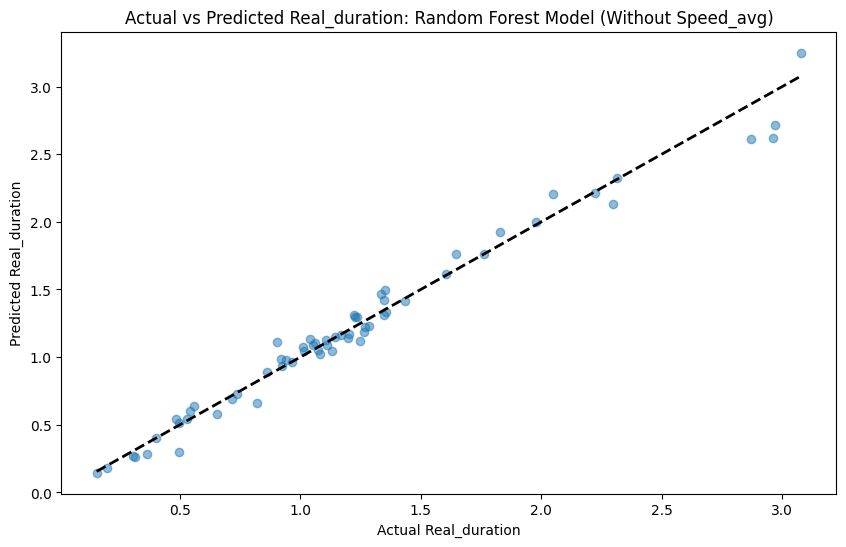

In [44]:
# Scatter plot of actual vs predicted values for the new Random Forest model (without Speed_avg)
plt.figure(figsize=(10, 6))
plt.scatter(y_test_new, y_pred_new, alpha=0.5)
plt.xlabel('Actual Real_duration')
plt.ylabel('Predicted Real_duration')
plt.title('Actual vs Predicted Real_duration: Random Forest Model (Without Speed_avg)')
plt.plot([y_test_new.min(), y_test_new.max()], [y_test_new.min(), y_test_new.max()], 'k--', lw=2)  # Diagonal line for reference
plt.show()


In [45]:
# Preparing the data for the new model, excluding 'Speed_min' and 'Speed_max'
X_new_2 = X.drop(['Speed_avg', 'Speed_min', 'Speed_max'], axis=1)

# Splitting the data into new training and testing sets without 'Speed_min' and 'Speed_max'
X_train_new_2, X_test_new_2, y_train_new_2, y_test_new_2 = train_test_split(X_new_2, y, test_size=0.2, random_state=42)

# Creating and training the new random forest model without 'Speed_min' and 'Speed_max'
rf_model_new_2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_new_2.fit(X_train_new_2, y_train_new_2)

# Predicting on the new test set
y_pred_new_2 = rf_model_new_2.predict(X_test_new_2)

# Calculating the Mean Squared Error for the new model
mse_new_2 = mean_squared_error(y_test_new_2, y_pred_new_2)
mse_new_2


0.010083820847804409

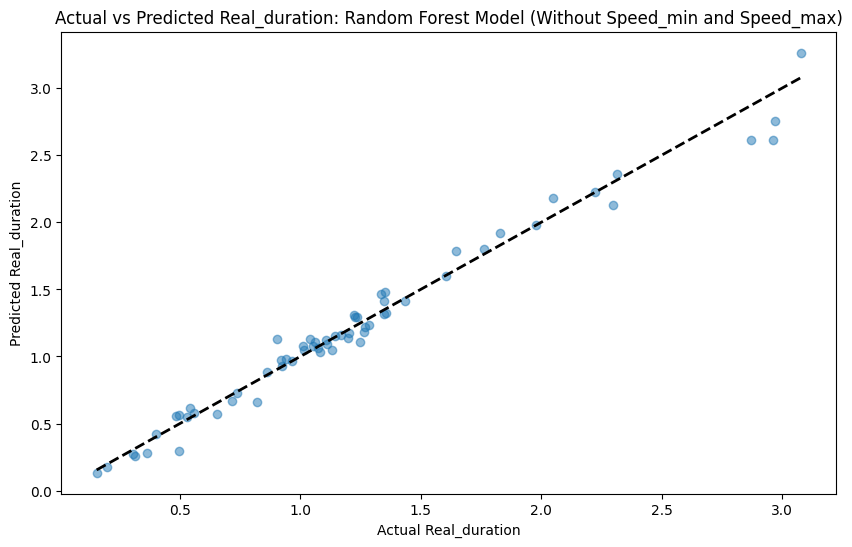

In [46]:
# Scatter plot of actual vs predicted values for the new Random Forest model (without Speed_min and Speed_max)
plt.figure(figsize=(10, 6))
plt.scatter(y_test_new_2, y_pred_new_2, alpha=0.5)
plt.xlabel('Actual Real_duration')
plt.ylabel('Predicted Real_duration')
plt.title('Actual vs Predicted Real_duration: Random Forest Model (Without Speed_min and Speed_max)')
plt.plot([y_test_new_2.min(), y_test_new_2.max()], [y_test_new_2.min(), y_test_new_2.max()], 'k--', lw=2)  # Diagonal line for reference
plt.show()


In [47]:
# Extracting feature importances from the random forest model
feature_importances = rf_model_new_2.feature_importances_

# Creating a DataFrame to display features and their importances
feature_importances_df = pd.DataFrame({
    'Feature': X_train_new_2.columns,
    'Importance': feature_importances
})

# Sorting the features by their importance
feature_importances_df.sort_values(by='Importance', ascending=False, inplace=True)
feature_importances_df


,Feature,Importance
0,Distance,0.765042
1,calories,0.213604
7,Cadence_avg,0.008475
10,Power_avg,0.003556
4,Heartrate_avg,0.002552
5,Cadence_max,0.002071
8,Power_max,0.001655
3,Heartrate_min,0.001338
12,hertrate_point in20,0.000982
2,Heartrate_max,0.000719
